In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import os 
import csv 
import networkx as nx 

In [2]:
df= pd.read_csv("mastodon_first_snapshot_anonim.csv")

In [3]:
df.head()

,0@pawoo.net,1@pawoo.net
0,0@pawoo.net,2@pawoo.net
1,3@mastodon.blue,4@mastodon.blue
2,5@imastodon.net,6@pawoo.net
3,5@imastodon.net,7@imastodon.net
4,5@imastodon.net,8@pawoo.net


In [5]:
G = nx.Graph() 


In [18]:
df_random = df.sample(n=50000, random_state=42)


In [19]:
for d, row in df_random.iterrows(): 
  G.add_edge(row[0], row[1])

In [20]:
connected_comp = list(nx.connected_components(G))
l_cc = max(connected_comp, key=len)
sub_graph = G.subgraph(l_cc)

In [21]:
# Get the degree sequence of the graph
degree_sequence = [d for n, d in sub_graph.degree()]

# Calculate the degree distribution as a dictionary
degree_distribution = {}
for degree in degree_sequence:
    if degree in degree_distribution:
        degree_distribution[degree] += 1
    else:
        degree_distribution[degree] = 1

# Normalize the degree distribution by dividing by the number of nodes
n_nodes = sub_graph.number_of_nodes()
for degree in degree_distribution:
    degree_distribution[degree] /= n_nodes

Text(0, 0.5, 'Distribution')

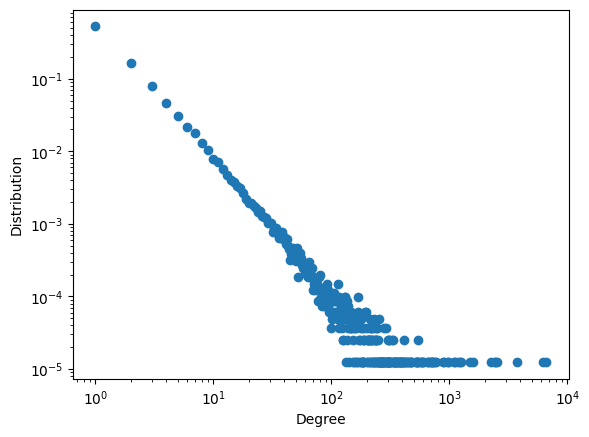

In [22]:
plt.scatter(list(degree_distribution.keys()), list(degree_distribution.values()))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Distribution")

In [23]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import powerlaw
fit = powerlaw.Fit(degree_sequence)

Calculating best minimal value for power law fit


In [25]:
print(fit.power_law.alpha)

2.6657532500475454


<Axes: >

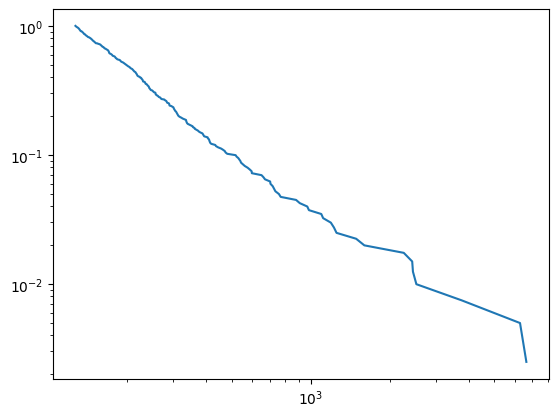

In [27]:
fit.plot_ccdf()

In [28]:
nx.average_clustering(sub_graph)

0.09171392231463688

In [29]:
cc= nx.clustering(sub_graph)

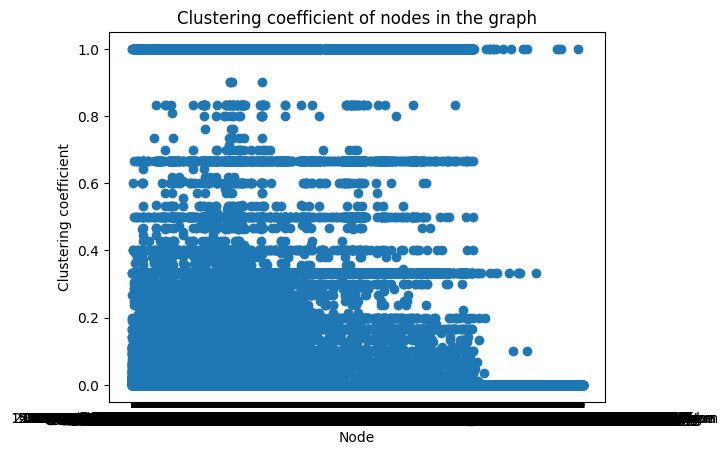

In [30]:
# Extract x and y coordinates for scatter plot
x = list(cc.keys())
y = list(cc.values())

# Plot clustering coefficient values
plt.scatter(x, y)
plt.xlabel("Node")
plt.ylabel("Clustering coefficient")
plt.title("Clustering coefficient of nodes in the graph")
plt.show()